In [1]:
!pip3 install seaborn

In [2]:
!pip3 install dateparser

In [3]:
!pip3 install gensim

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
from collections import Counter
from gensim import corpora, models
import pylab as plt

In [5]:
os.listdir(os.getcwd())

['.DS_Store',
 'funciones.py',
 'attacks.csv',
 'pandas-project.py',
 '__pycache__',
 'pandas-project.ipynb',
 '.ipynb_checkpoints',
 'data_attack_cleaned.csv']

In [6]:
data=pd.read_csv('attacks.csv')

In [7]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [8]:
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [9]:
data.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [10]:
data = data.drop('Unnamed: 22', axis=1)

In [11]:
data = data.drop('Unnamed: 23', axis=1)

In [12]:
data = data.rename(columns={'Fatal (Y/N)': 'Fatal'})

In [13]:
data = data.rename(columns={'Sex ': 'Sex'})

In [14]:
data = data.rename(columns={'Species ': 'Species'})

In [15]:
data = data.rename(columns={'original order': 'Order'})

In [16]:
data = data.rename(columns={'Investigator or Source': 'Investigator'})

In [17]:
data.dtypes

Case Number      object
Date             object
Year              int64
Type             object
Country          object
Area             object
Location         object
Activity         object
Name             object
Sex              object
Age              object
Injury           object
Fatal            object
Time             object
Species          object
Investigator     object
pdf              object
href formula     object
href             object
Case Number.1    object
Case Number.2    object
Order             int64
dtype: object

In [18]:
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Country           43
Area             402
Location         496
Activity         527
Name             200
Sex              567
Age             2681
Injury            27
Fatal             19
Time            3213
Species         2934
Investigator      15
href formula       1
href               3
dtype: int64

In [19]:
data[['href']] = data[['href']].fillna('href formula')
data["href"].value_counts()

http://sharkattackfile.net/spreadsheets/pdf_directory/w014.01.25-Grant.pdf                   4
href formula                                                                                 3
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.02.b-Vandenberg.pdf            3
http://sharkattackfile.net/spreadsheets/pdf_directory/1907.10.16.R-HongKong.pdf              2
http://sharkattackfile.net/spreadsheets/pdf_directory/1923.00.00.a-NJ fisherman.pdf          2
                                                                                            ..
http://sharkattackfile.net/spreadsheets/pdf_directory/1974.04.14-Parkin.pdf                  1
http://sharkattackfile.net/spreadsheets/pdf_directory/1965.00.00.e-Frank-RivieraBeach.pdf    1
http://sharkattackfile.net/spreadsheets/pdf_directory/1976.01.13-catamaran.pdf               1
http://sharkattackfile.net/spreadsheets/pdf_directory/1880.00.00.a-CampbellsPoint.pdf        1
http://sharkattackfile.net/spreadsheets/pdf_direct

In [20]:
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Country           43
Area             402
Location         496
Activity         527
Name             200
Sex              567
Age             2681
Injury            27
Fatal             19
Time            3213
Species         2934
Investigator      15
href formula       1
dtype: int64

In [21]:
data[['href formula']] = data[['href formula']].fillna('http://sharkattackfile.net/spreadsheets/pdf_directory/1975.01.19-Barrowman.pdf')

In [22]:
data[['href', 'href formula']]

,href,href formula
0,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...
5987,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5988,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5989,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5990,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [23]:
data["Country"].value_counts()

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
                    ... 
IRAN / IRAQ            1
COOK ISLANDS           1
INDIAN OCEAN?          1
WESTERN SAMOA          1
RED SEA                1
Name: Country, Length: 203, dtype: int64

In [24]:
data["Area"].value_counts()

Florida                                  990
New South Wales                          468
Queensland                               300
Hawaii                                   282
California                               276
                                        ... 
Rivers State                               1
Congreve Channel                           1
Cargados Carajos Shoals (St. Brandon)      1
Primorje-Gorski Kotar County               1
Mindoro Occidental                         1
Name: Area, Length: 785, dtype: int64

In [25]:
data["Location"].value_counts()

New Smyrna Beach, Volusia County               157
Daytona Beach, Volusia County                   28
Ponce Inlet, Volusia County                     17
Myrtle Beach, Horry County                      17
Melbourne Beach, Brevard County                 15
                                              ... 
Off Capo San Croce, near Augusta (Catania)       1
Lauderdale-By-The-Sea, Broward County            1
T.O. Strand                                      1
Mahabalipuram beach, 37 km south of Chennai      1
Palm Cove                                        1
Name: Location, Length: 3929, dtype: int64

In [26]:
data["Name"].value_counts()

male                  495
female                 85
boy                    23
2 males                14
boat                   14
                     ... 
Steve Rosebloome        1
a fisherman             1
Leon Ritson Hermes      1
small girl              1
Jana Lutteropp          1
Name: Name, Length: 5009, dtype: int64

In [27]:
data["Age"].value_counts()

17                148
18                145
19                138
20                136
15                135
                 ... 
9 & 12              1
7      &    31      1
17 & 35             1
2Ω                  1
25 or 28            1
Name: Age, Length: 151, dtype: int64

In [28]:
data["Injury"].value_counts()

FATAL                                                                                             729
Survived                                                                                           97
Foot bitten                                                                                        82
No injury                                                                                          77
Leg bitten                                                                                         71
                                                                                                 ... 
No injury, diver shot shark & it bit his speargun PROVOKED INCIDENT                                 1
No injury but shark punctured his wetsuit after he prodded it with his spear PROVOKED INCIDENT      1
FATAL, hand & leg severely injured by shark that leapt into boat                                    1
6-inch gash on right foot                                                         

In [29]:
data["Species"].value_counts()

White shark                        161
Shark involvement not confirmed     80
Tiger shark                         68
Bull shark                          52
6' shark                            40
                                  ... 
500-lb shark                         1
White shark, 5' to 6' juvenile       1
8' white shark or 7-gill shark       1
White shark, 7m                      1
Tiger shark, >3 m [10']              1
Name: Species, Length: 1538, dtype: int64

In [30]:
data[['Country', 'Area', 'Location']]= data[['Country', 'Area', 'Location']].fillna('UNKNOWN')

In [31]:
#Limpiando los valores de Country
data['Country'] = data['Country'].astype('str')
data["Country"] = data["Country"].str.rstrip()
data["Country"] = data["Country"].str.lstrip()

In [32]:
#Limpiando los valores de Country
data['Country'] = data['Country'].str.replace('Fiji','FIJI')
data['Country'] = data['Country'].str.replace('St Helena','ST HELENA')
data['Country'] = data['Country'].str.replace('Sierra Leone','SIERRA LEONE')
data['Country'] = data['Country'].str.replace('Seychelles','SEYCHELLES')
data['Country'] = data['Country'].str.replace('?', '')
data['Country'] = data['Country'].str.replace('-', '')
data['Country'] = data['Country'].str.replace('Coast of AFRICA','COAST OF AFRICA')
data['Country'] = data['Country'].str.replace('EGYPT / ISRAEL','EGYPT')
data['Country'] = data['Country'].str.replace('RED SEA / INDIAN OCEAN','YEMEN')
data['Country'] = data['Country'].str.replace('ANDAMAN / NICOBAR ISLANDAS','INDIA')
data['Country'] = data['Country'].str.replace('EQUATORIAL GUINEA / CAMEROON','EQUATORIAL GUINEA')
data['Country'] = data['Country'].str.replace('IRAN / IRAQ','IRAN')
data['Country'] = data['Country'].str.replace('ITALY / CROATIA','CROATIA')
data['Country'] = data['Country'].str.replace('SOLOMON ISLANDS / VANUATU','SOLOMON ISLANDS')
data['Country'] = data['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')
data['Country'] = data['Country'].str.replace(' (UAE)','')
data['Country'] = data['Country'].str.replace(' (SRI LANKA)','')
data['Country'] = data['Country'].str.replace('CEYLON \(SRI LANKA\)','SRI LANKA')
data['Country'] = data['Country'].str.replace('Between PORTUGAL & INDIA','PORTUGAL')
data["Country"] = data["Country"].str.replace("ST. MAARTIN","SAINT MARTIN")
data["Country"] = data["Country"].str.replace("ST. MARTIN","SAINT MARTIN")
data["Country"] = data["Country"].str.replace("COLUMBIA","COLOMBIA")
data["Country"] = data["Country"].str.replace("UNITED ARAB EMIRATES \(UAE\)","UNITED ARAB EMIRATES")
data["Country"] = data["Country"].str.replace("ENGLAND","UNITED KINGDOM")
data["Country"] = data["Country"].str.replace("SCOTLAND","UNITED KINGDOM")
data["Country"] = data["Country"].str.replace("(.*)\?","UNKNOWN")
data["Country"] = data["Country"].str.replace("Trinidad & Tobago","TRINIDAD AND TOBAGO")
data["Country"] = data["Country"].str.replace("^(New Guinea)","PAPUA NEW GUINEA")
data["Country"] = data["Country"].str.replace("New Britain","APUA NEW GUINEA")

In [33]:
data.Country.unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLOMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'FIJI', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND',
       'PUERTO RICO', 'ITALY', 'MEXICO', 'ATLANTIC OCEAN', 'GREECE',
       'MAURITIUS', 'UNKNOWN', 'SAINT MARTIN', 'FRANCE', 'ECUADOR',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA',
       'UNITED KINGDOM', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE',
       'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA',
       'MALAYSIA', 'SAMOA', 'AZORES', 'SOLOMON ISLANDS', 'SOUTH KOREA',
       'MALTA', 'VIETNAM', 'MADAGASCAR', 'PANAMA', 'SOMALIA', 'NEVIS',
       'CUBA', 'BRITISH VIRG

In [34]:
data['Country'].value_counts()

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
                    ... 
KOREA                  1
GULF OF ADEN           1
ST HELENA              1
MONACO                 1
MALDIVE ISLANDS        1
Name: Country, Length: 177, dtype: int64

In [35]:
#Limpiando la columna de los ataques
data[['Fatal']]= data[['Fatal']].fillna('UNKNOWN')
data.loc[data["Fatal"] == " N", "Fatal"] = "N"
data.loc[data["Fatal"] == "N ", "Fatal"] = "N"
data.loc[data["Fatal"] == "n", "Fatal"] = "N"
data.loc[data["Fatal"] == "F", "Fatal"] = "Y"
data.loc[data["Fatal"] == "#VALUE!", "Fatal"] = "UNKNOWN"
data.loc[data["Fatal"] == "--M524--M3133Y", "Fatal"] = "UNKNOWN"

In [36]:
def clean_fatal(fatal):
    if fatal == 'N' or fatal == 'Y':
        return fatal
    else:
        return 'UNKNOWN'

In [37]:
data['Fatal'] = data['Fatal'].apply(clean_fatal)

In [38]:
data['Fatal'].value_counts()

N          4325
Y          1553
UNKNOWN     114
Name: Fatal, dtype: int64

In [39]:
fatal_vals = data['Fatal'].value_counts().tolist()

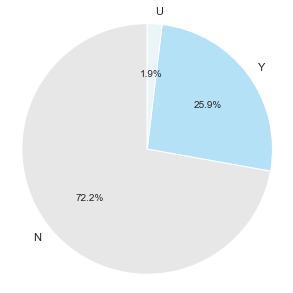

In [40]:
f, ax = plt.subplots(figsize=(5, 5))

labels = ['N', 'Y', 'U']
colors = ['#E7E7E7', '#B4E1F6', '#EBF4F7']

plt.pie(fatal_vals, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
 
axis = plt.axis('equal')

In [41]:
#Limpiando la columna del sexo
data[['Sex']]= data[['Sex']].fillna('UNKNOWN')
data['Sex']= data['Sex'].str.replace('lli', 'UNKNOWN')
data['Sex']= data['Sex'].str.replace('.', 'UNKNOWN')
data['Sex']= data['Sex'].str.replace('M ', 'M')

In [42]:
def clean_sex(sex):
    if sex == 'M' or sex == 'F':
        return sex
    else:
        return 'UNKNOWN'

In [43]:
data['Sex'] = data['Sex'].apply(clean_sex)

In [44]:
data['Sex'].value_counts()

M          4837
F           585
UNKNOWN     570
Name: Sex, dtype: int64

In [45]:
sex_vals = data['Sex'].value_counts().tolist()

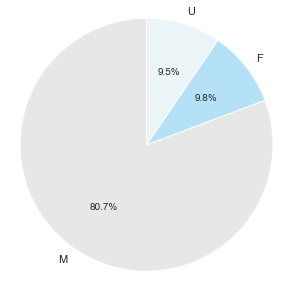

In [46]:
f, ax = plt.subplots(figsize=(5, 5))

labels = ['M', 'F', 'U']
colors = ['#E7E7E7', '#B4E1F6', '#EBF4F7']

plt.pie(sex_vals, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

axis = plt.axis('equal')

In [47]:
#Limpiando la columna de la edad
data['Age']= data['Age'].str.replace('N/A', 'UNKNOWN')
data['Age']= data['Age'].str.replace('X', 'UNKNOWN')
data['Age']= data['Age'].str.replace('†', 'UNKNOWN')
data['Age']= data['Age'].str.replace('† ', 'UNKNOWN')
data['Age']= data['Age'].str.replace('MAKE LINE GREEN', 'UNKNOWN')
data['Age']= data['Age'].str.replace('A.M.', 'UNKNOWN')
data['Age']= data['Age'].str.replace('--', 'UNKNOWN')
data.loc[data.Age=='60s', 'Age'] = '60'
data.loc[data.Age=="60's", 'Age'] = '60'
data.loc[data.Age=='50s', 'Age'] = '50' 
data.loc[data.Age=='40s', 'Age'] = '40'
data.loc[data.Age=='30s', 'Age'] = '30' 
data.loc[data.Age=='20s', 'Age'] = '20' 
data.loc[data.Age=='Teen', 'Age'] = '15'
data.loc[data.Age== 'teen', 'Age'] = '15'
data.loc[data.Age=='Teens', 'Age'] = '15'
data.loc[data.Age=='18 months', 'Age'] = '1'
data.loc[data.Age=='M', 'Age'] = 'UNKNOWN'
data.loc[data.Age=='F', 'Age'] = 'UNKNOWN'
data.loc[data.Age== 'mid-30s', 'Age'] = '35'
data.loc[data.Age=='28 & 26', 'Age'] = '27'
data.loc[data.Age=='18 or 20', 'Age'] = '19'
data.loc[data.Age=='12 or 13', 'Age'] = '13'
data.loc[data.Age=='46 & 34', 'Age'] = '40'
data.loc[data.Age=='28, 23 & 30', 'Age'] = '27'
data.loc[data.Age=='30 or 36', 'Age'] = '33'
data.loc[data.Age=='6½', 'Age'] = '6'
data.loc[data.Age=='23 & 20', 'Age'] = '21'
data.loc[data.Age=='8 or 10', 'Age'] = '9'
data.loc[data.Age=='7      &    31', 'Age'] = '31'
data.loc[data.Age=='20?', 'Age'] = '20'
data.loc[data.Age=='21 & ?', 'Age'] = '21'
data.loc[data.Age=='36 & 26', 'Age'] = '31'
data.loc[data.Age=='32 & 30', 'Age'] = '31'
data.loc[data.Age=='33 or 37', 'Age'] = '35'
data.loc[data.Age=='16 to 18', 'Age'] = '17'
data.loc[data.Age=='13 or 18', 'Age'] = '15'
data.loc[data.Age==' ', 'Age'] = 'UNKNOWN'
data.loc[data.Age==' 30', 'Age'] = '30'
data.loc[data.Age=='mid-20s', 'Age'] = '25'
data.loc[data.Age=='18 to 22', 'Age'] = '20'
data.loc[data.Age=='Ca. 33', 'Age'] = '33'
data.loc[data.Age=='74 ', 'Age'] = '74'
data.loc[data.Age=='45 ', 'Age'] = '45'
data.loc[data.Age=='21 or 26', 'Age'] = '24'
data.loc[data.Age=='20 ', 'Age'] = '20'
data.loc[data.Age=='>50', 'Age'] = '51'
data.loc[data.Age=='>50', 'Age'] = '51'
data.loc[data.Age=='9 & 12', 'Age'] = '11'
data.loc[data.Age=='? & 19', 'Age'] = '19'
data.loc[data.Age=='9 months', 'Age'] = '1'
data.loc[data.Age=='25 to 35', 'Age'] = '30'
data.loc[data.Age=='23 & 26', 'Age'] = '24'
data.loc[data.Age=='33 & 37', 'Age'] = '35'
data.loc[data.Age=='25 or 28', 'Age'] = '27'
data.loc[data.Age=='37, 67, 35, 27,  ? & 27', 'Age'] = '39'
data.loc[data.Age=='21, 34,24 & 35', 'Age'] = '30'
data.loc[data.Age=='30 & 32', 'Age'] = '31'
data.loc[data.Age=='50 & 30', 'Age'] = '40'
data.loc[data.Age=='17 & 35', 'Age'] = '26'
data.loc[data.Age=='34 & 19', 'Age'] = '26'
data.loc[data.Age=='2 to 3 months', 'Age'] = '0'
data.loc[data.Age=='7 or 8', 'Age'] = '7'
data.loc[data.Age=='17 & 16', 'Age'] = '16'
data.loc[data.Age=='Both 11', 'Age'] = '11'
data.loc[data.Age=='13 or 14', 'Age'] = '13'
data.loc[data.Age=='2½', 'Age'] = '2'
data.loc[data.Age==' 43', 'Age'] = '43'
data.loc[data.Age=='9 or 10', 'Age'] = '10'
data.loc[data.Age=='36 & 23', 'Age'] = '30'
data.loc[data.Age=='  ', 'Age'] = 'UNKNOWN'
data.loc[data.Age=='10 or 12', 'Age'] = '10'
data.loc[data.Age=='?    &   14', 'Age'] = '14'
data.loc[data.Age=='31 or 33', 'Age'] = '32'
data.loc[data.Age=='Elderly', 'Age'] = '70'
data.loc[data.Age=='(adult)', 'Age'] = '40'
data.loc[data.Age=='adult', 'Age'] = '40'
data.loc[data.Age=='"middle-age"', 'Age'] = '50'
data.loc[data.Age=='"young"', 'Age'] = '20'
data.loc[data.Age=='young', 'Age'] = '20'
data['Age'].fillna(0, inplace=True)

In [48]:
def clean_age(age):
    try:
        age = int(age)
    except ValueError:
        age = 0
    if (age > 0 and age <= 100):
        return age
    else:
        return np.nan

In [49]:
data['Age'] = data['Age'].apply(clean_age)

In [50]:
data.Age.unique()

array([16., 36., 43., nan, 60., 51., 50., 12.,  9., 22., 25., 37., 20.,
       49., 15., 21., 40., 72., 18., 29., 31., 11., 10., 59., 42., 34.,
       35., 19.,  6., 27., 64., 23., 52., 13., 57., 48., 39., 24., 26.,
       69., 46., 41., 45., 65., 38., 71., 32., 58., 28., 54., 44., 14.,
        7., 62., 68., 47., 17., 30., 63., 70.,  1., 53., 33.,  8., 61.,
       55., 66., 77., 74.,  3., 56.,  5., 86., 84., 75., 73., 87., 67.,
       81., 78.])

In [51]:
data['Age'].value_counts()

15.0    150
17.0    149
20.0    147
18.0    145
19.0    140
       ... 
84.0      1
87.0      1
67.0      1
86.0      1
81.0      1
Name: Age, Length: 79, dtype: int64

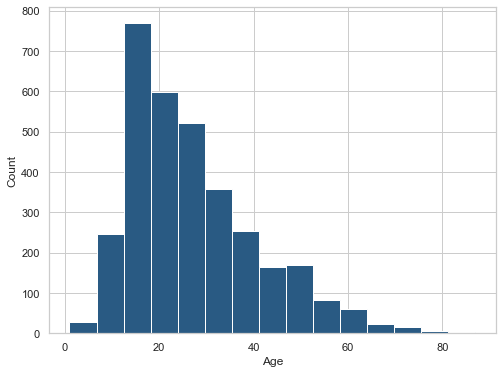

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(data['Age'].dropna(), hist_kws={"alpha": 1, "color": "#295A83"}, kde=False, bins=15)

ax = ax.set(ylabel="Count", xlabel="Age")

In [53]:
data['Age'].fillna('UNKNOWN', inplace=True)

In [54]:
#Limpiando la columna de las actividades
data[['Activity']]= data[['Activity']].fillna('UNKNOWN')
data['Activity']= data['Activity'].str.replace('.', 'UNKNOWN')

In [55]:
def clean_act(x):
    if isinstance(x, str):
        x = x.lower()
        if 'surfing' in x:
            return "Surfing"
        elif 'swimming' in x:
            return "Swimming"
        elif 'fishing' in x:
            return "Fishing"
        elif 'bathing' in x:
            return "Bathing"
        elif 'wading' in x:
            return "Wading"
        elif 'diving'or 'free' in x:
            return "Diving"
        elif 'yacht' in x:
            return "Yacht"
        else:
            return "UNKNOWN"
    else:
        return "UNKNOWN"
       
data["Activity"] = data["Activity"].apply(lambda x: clean_act(x))

In [56]:
data['Activity'].value_counts()

Diving      2420
Fishing     1122
Swimming    1056
Surfing     1054
Bathing      180
Wading       160
Name: Activity, dtype: int64

In [57]:
popular_activities = Counter(data['Activity'].tolist()).most_common(20)
activities = [actv_list[0] for actv_list in popular_activities]
counts = [actv_list[1] for actv_list in popular_activities]

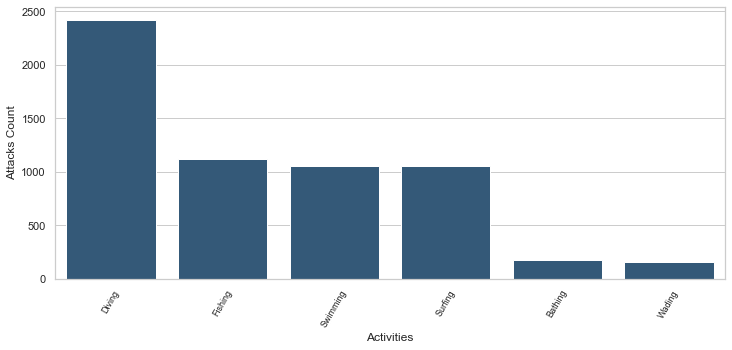

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(x=activities, y=counts, color='#295A83', ax=ax)
ax.set(ylabel="Attacks Count", xlabel="Activities")

ticks = plt.setp(ax.get_xticklabels(), rotation=60, fontsize=9)

In [59]:
#Corrigiendo errores de la columna date   
def clean_date(date):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    num_months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    date = str(date)
    if (len(date) == 11 and date[2] == '-'):
        for i in range(len(months)):
            date = date.replace(months[i], num_months[i])
        return date
    else:
        return np.nan

In [60]:
data['Date'] = data['Date'].apply(clean_date)

In [61]:
dates = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

In [62]:
days = dates.map(lambda x: x.day)
days_counter = Counter(days)
days_keys = list(days_counter.keys())
days_values = list(days_counter.values())

In [63]:
months = dates.map(lambda x: x.month)

def season(month):
    if month >= 3 and month <= 5:
        return 'primavera'
    elif month >= 6 and month <= 8:
        return 'verano'
    elif month >= 9 and month <= 11:
        return 'otoño'
    else:
        return 'invierno'

months_labels = months.apply(season)

months_counter = Counter(months_labels)
months_keys = list(months_counter.keys())
months_values = list(months_counter.values())

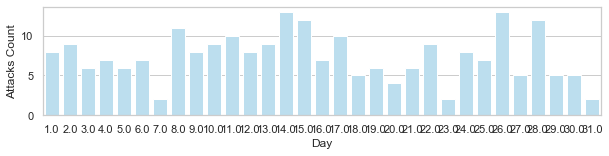

In [64]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(x=days_keys, y=days_values, color='#B4E1F6', ax=ax)
ax = ax.set(ylabel="Attacks Count", xlabel="Day")

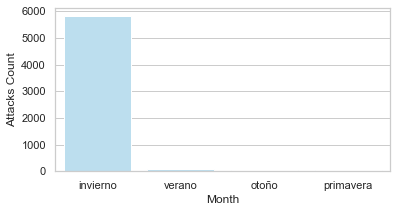

In [65]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=months_keys, y=months_values, color='#B4E1F6', ax=ax)
ax = ax.set(ylabel="Attacks Count", xlabel="Month")

In [66]:
data['Date'].value_counts()

08-08-1899    3
26-07-1885    3
12-11-1882    2
02-09-1878    2
08-06-1849    2
             ..
11-09-1887    1
15-08-1899    1
04-12-1887    1
28-10-1898    1
13-07-1862    1
Name: Date, Length: 225, dtype: int64

In [67]:
data['Date'].unique()

array([nan, ' 2-07-1997', '18-12-1899', '20-11-1899', '15-08-1899',
       '08-08-1899', '07-06-1899', '28-05-1899', '28-01-1899',
       '28-10-1898', '22-08-1898', '15-07-1898', '14-07-1898',
       '22-06-1898', '13-04-1898', '15-10-1897', '17-09-1897',
       '06-09-1897', '21-07-1897', '09-06-1897', '23-12p1896',
       '20-12-1896', '29-11-1896', '01-11-1896', '25-07-1896',
       '09-12-1895', '16-11-1895', '18-09-1895', '11-08-1895',
       '21-05-1895', '03-05-1895', '29-04-1895', '23-04-1895',
       '15-03-1895', '27-02-1895', '11-12-1894', '28-11-1894',
       '21-08-1894', '01-08-1894', '29-06-1894', '25-06-1894',
       '16-10-1893', '03-07-1893', '22-06-1893', '17-05-1893',
       '14-04-1893', '04-04-1893', '15-12-1892', '06-11-1892',
       '24-06-1892', '02-03-1892', '29-08-1891', '11-06-1891',
       '10-03-1891', '30-12-1890', '14-05-1890', '25-02-1890',
       '22-11-1889', '16-11-1889', '21-07-1889', '08-07-1889',
       '09-12-1888', '14-08-1888', '04-07-1888', '

In [68]:
data['Year']= data['Year'].fillna('UNKNOWN')

In [69]:
def clean_year(year):
    if year > int(1000): 
        return year
    else:
        return 'UNKNOWN'

In [70]:
data['Year'] = data['Year'].apply(clean_year)

In [71]:
data['Year'].value_counts()

2015       139
2011       128
UNKNOWN    127
2014       125
2013       122
          ... 
1800         1
1791         1
1788         1
1787         1
1834         1
Name: Year, Length: 229, dtype: int64

In [72]:
data[['Injury']]= data[['Injury']].fillna('UNKNOWN')

In [73]:
activity_injury = data['Injury'].tolist()

In [74]:
activity_injury[:10]

['Minor injury to thigh',
 'Lacerations to hands',
 'Lacerations to lower leg',
 'Struck by fin on chest & leg',
 'No injury: Knocked off board by shark',
 'Shark rammed boat. No injury to occupant',
 'Minor injury to arm',
 'Severe lacerations to shoulder & forearm',
 'FATAL',
 'Lacerations & punctures to lower right leg']

In [75]:
data['Injury'].value_counts()

FATAL                                                                                             729
Survived                                                                                           97
Foot bitten                                                                                        82
No injury                                                                                          77
Leg bitten                                                                                         71
                                                                                                 ... 
Minor cuts to right buttock & thigh                                                                 1
No injury, diver shot shark & it bit his speargun PROVOKED INCIDENT                                 1
No injury but shark punctured his wetsuit after he prodded it with his spear PROVOKED INCIDENT      1
FATAL, hand & leg severely injured by shark that leapt into boat                  

In [76]:
data[['Investigator']]= data[['Investigator']].fillna('UNKNOWN')

In [77]:
data['Investigator'].value_counts()

C. Moore, GSAF                                             94
S. Petersohn, GSAF                                         82
C. Creswell, GSAF                                          81
R. Collier                                                 54
T. Peake, GSAF                                             48
                                                           ..
D. Miller & R. Collier; R. Collier, pp.32-33                1
J. Waters, U.S. Coast Guard; San Mateo Times, 10/5/1951     1
Big Piney Examiner, 12/9/1915                               1
Beeld, 12/29/2009                                           1
News Tribune, 6/28/1964                                     1
Name: Investigator, Length: 4753, dtype: int64

In [78]:
def clean_invest(x):
    if isinstance(x, str):
        x = x.lower()
        if 'moore' in x:
            return "C. Moore"
        elif 'sohn' in x:
            return "S. Petersohn"
        elif 'well' in x:
            return "C. Creswell"
        elif 'collier' in x:
            return "R. Collier"
        elif 'peak' in x:
            return "T. Peake"
        elif 'leaklye' in x:
            return "A. Bleaklye"
        elif 'renneka' in x:
            return "A. Brenneka"
        elif 'ddalena' in x:
            return "A. de Maddalena"
        elif 'apson' in x:
            return "A. M. Rapson"
        elif 'isbane' in x:
            return "Brisbane Courier"
        elif 'arpe' in x:
            return "A. Sharpe"
        elif 'lack' in x:
            return "C. Black"
        elif 'oday' in x:
            return "Florida Today"
        elif 'arter' in x:
            return "G. Carter"
        elif 'ouvelles' in x:
            return "Les Nouvelles Caledoniennes"
        else:
            return "UNKNOWN"
    else:
        return "UNKNOWN"
       
data["Investigator"] = data["Investigator"].apply(lambda x: clean_invest(x))

In [79]:
data.Investigator.unique()

array(['UNKNOWN', 'Les Nouvelles Caledoniennes', 'C. Creswell',
       'R. Collier', 'C. Black', 'Florida Today', 'A. de Maddalena',
       'A. Brenneka', 'Brisbane Courier', 'T. Peake', 'S. Petersohn',
       'A. Sharpe', 'G. Carter', 'C. Moore', 'A. M. Rapson'], dtype=object)

In [80]:
data['Investigator'].value_counts()

UNKNOWN                        4765
R. Collier                      247
S. Petersohn                    178
C. Creswell                     167
C. Moore                        152
A. Sharpe                        97
A. M. Rapson                     69
T. Peake                         67
Brisbane Courier                 55
C. Black                         39
A. de Maddalena                  37
Florida Today                    35
G. Carter                        32
A. Brenneka                      29
Les Nouvelles Caledoniennes      23
Name: Investigator, dtype: int64

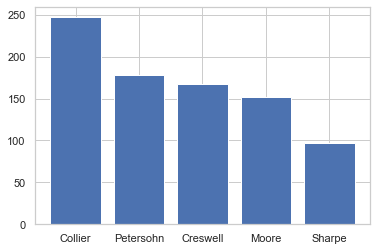

In [81]:
Investigators = [1,2,3,4,5]
Mentions = [247, 178, 167, 152, 97]

LABELS = ["Collier", "Petersohn", "Creswell", "Moore", "Sharpe",]

plt.bar(Investigators, Mentions, align='center')
plt.xticks(Investigators, LABELS)
plt.show()

In [82]:
data['Time']= data['Time'].fillna('UNKNOWN')
data['Time']= data['Time'].str.replace('X', 'UNKNOWN')
data['Time']= data['Time'].str.replace('†', 'UNKNOWN')
data['Time']= data['Time'].str.replace('† ', 'UNKNOWN')

In [83]:
data['Time'].value_counts()

UNKNOWN        3214
Afternoon       174
11h00           123
12h00           107
Morning         107
               ... 
15h05             1
10h16             1
"Night"           1
19h00-20h00       1
830               1
Name: Time, Length: 357, dtype: int64

In [84]:
data[['Name']]= data[['Name']].fillna('UNKNOWN')

In [85]:
data['Name'].value_counts()

male                  495
UNKNOWN               200
female                 85
boy                    23
boat                   14
                     ... 
Brian Cramer            1
Steve Rosebloome        1
a fisherman             1
Leon Ritson Hermes      1
Jana Lutteropp          1
Name: Name, Length: 5010, dtype: int64

In [86]:
#limpiando la columna de especies
def clean_species(x):
    if isinstance(x, str):
        x = x.lower()
        if 'white' in x:
            return "White Shark"
        elif 'tiger' in x:
            return "Tiger Shark"
        elif 'lemon' in x:
            return "Lemon Shark"
        elif 'mako' in x:
            return "Mako Shark"
        elif 'nurse' in x:
            return "Nurse Shark"
        elif 'grey' in x:
            return "Grey Reef Shark"
        elif 'copper' in x:
            return "Copper Shark"
        elif 'hammerhead' in x:
            return "Hammerhead Shark"
        elif 'wobbegong' in x:
            return "Wobbegong Shark"
        elif 'blacktip' in x:
            return "Blacktip Shark"
        elif 'caribbean' in x:
            return "Caribbean Reef Shark"
        elif 'blue'or 'porbeagle' in x:
            return "Blue Shark"
        elif 'dusky' in x:
            return "Dusky Shark"
        elif 'bull' in x:
            return "Bull Shark"
        elif 'zambesi' in x:
            return "Zambesi Shark"
        elif 'cocktail' in x:
            return "Cocktail Shark"
        elif 'vertiser' in x:
            return "The Advertiser"
        else:
            return "UNKNOWN"
    else:
        return "UNKNOWN"
       
data["Species"] = data["Species"].apply(lambda x: clean_species(x))

In [87]:
data['Species'].value_counts()

UNKNOWN                 2934
Blue Shark              1704
White Shark              646
Tiger Shark              282
Blacktip Shark           102
Nurse Shark               93
Mako Shark                56
Hammerhead Shark          48
Wobbegong Shark           45
Lemon Shark               34
Grey Reef Shark           25
Caribbean Reef Shark      17
Copper Shark               6
Name: Species, dtype: int64

In [88]:
data.Species.unique()

array(['UNKNOWN', 'Blue Shark', 'Tiger Shark', 'White Shark',
       'Blacktip Shark', 'Nurse Shark', 'Lemon Shark',
       'Caribbean Reef Shark', 'Mako Shark', 'Wobbegong Shark',
       'Grey Reef Shark', 'Hammerhead Shark', 'Copper Shark'],
      dtype=object)

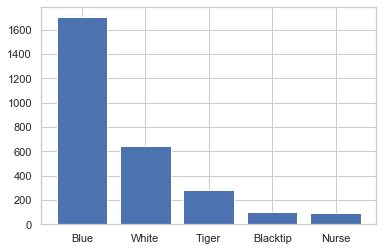

In [89]:
Sharks = [1,2,3,4,5]
Attacks = [1704, 646, 282, 102, 93]

LABELS = ["Blue", "White", "Tiger", "Blacktip", "Nurse",]

plt.bar(Sharks, Attacks, align='center')
plt.xticks(Sharks, LABELS)
plt.show()

In [90]:
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Date    5759
dtype: int64

In [91]:
data['Area'].value_counts()

Florida               990
New South Wales       468
UNKNOWN               402
Queensland            300
Hawaii                282
                     ... 
Sanma Province          1
Madang (WO)             1
Yucatan Channel         1
Imperia Province        1
Mindoro Occidental      1
Name: Area, Length: 786, dtype: int64

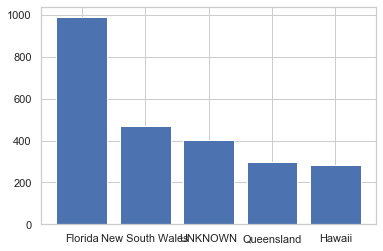

In [92]:
Area = [1,2,3,4,5]
Attacks = [990, 468, 402, 300, 282]

LABELS = ["Florida", "New South Wales", "UNKNOWN", "Queensland", "Hawaii",]

plt.bar(Sharks, Attacks, align='center')
plt.xticks(Sharks, LABELS)
plt.show()

In [93]:
data['Area'] = data['Area'].str.replace('?', '')
data['Area'] = data['Area'].str.replace('-', '')
data["Area"] = data["Area"].str.replace("(.*)\?"," ")
data["Area"] = data["Area"].str.replace("\d\d"," ")
data["Area"] = data["Area"].str.replace("\d"," ")

In [94]:
data.Area.unique()

array(['Florida', 'Victoria', 'Western Australia', 'Hawaii',
       'North Province', 'South Carolina', 'California', 'UNKNOWN',
       'New Providence Island', 'Alicante Province', 'Hong Kong',
       'New South Wales', 'Kochi Prefecture', 'Tasmania', 'Abaco Islands',
       'Queensland', 'Alabama', 'Canary Islands', 'Massachusetts',
       'North Carolina', 'Isla Provedencia', 'Western Cape Province',
       'Texas', 'Suez', 'North Island', 'Bali', 'Tuamotos', 'Grand Terre',
       'Boa Vista Island', 'Vanua Levu', 'South Australia',
       'Santa Catarina State', 'South Province', 'Altagracia Province',
       'Grand Cayman', 'KwaZuluNatal', 'Fujairah Emirate',
       'Grand Canary Island', 'Pernambuco', 'Eastern Cape Province',
       'Inhambane Province', 'Phuket', 'Alicante', 'Bora Bora',
       'Grand Bahama Island', 'Le Port', 'Rangiroa',
       'SaintGilleslesBains', 'Sardinia', 'Sinaloa', 'Central Tuamotu',
       'dí…tangSalÈ', 'Granada', 'Cargados Carajos Shoals (St. Brando

In [95]:
data.to_csv('data_attack_cleaned.csv', index=False)